# Gerrit Ezra Yudi Kairupan
# NIM 19/446777/TK/49882

## Instal Lib

In [ ]:
!pip install eli5 #instal eli5

     |████████████████████████████████| 106 kB 5.0 MB/s 


In [ ]:
!pip install shap #instal shap

     |████████████████████████████████| 356 kB 5.2 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491649 sha256=fe72e8d942d162c57a061444a7c6364b1346b375b4f9bedf4b058690d697d006
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
# -------- Nama   : Gerrit Ezra Yudi Kairupan   -------- #
# -------- NIM    : 19/446777/TK/49882          -------- #
# -------- Rekayasa Data Kelas A Gnjl 2021/2022 -------- #

from sklearn.preprocessing import StandardScaler
import os
import numpy as np
import pandas as pd 
import warnings as warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import jaccard_similarity_score
from sklearn import metrics
from sklearn import preprocessing
import itertools
from sklearn.model_selection import validation_curve

from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.inspection.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.ensemble import GradientBoostingClassifier

import eli5
from eli5.sklearn import PermutationImportance

import shap
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df = pd.read_csv("sample_data/clevelan.data-Heart Disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data Cleaning

In [ ]:
# Mencari Data apakah ada yang null atau tidak
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
round(df.isnull().sum()*100/len(df),2)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

Tidak ada nilai Null pada dataset, sehingga sangat baik untuk dilakukan analisa.

# Data Analysis

## Data Sampel Diagnosis Penyakit Jantung

In [ ]:
df_target = df.groupby("target").size()
df_target

target
0    138
1    165
dtype: int64

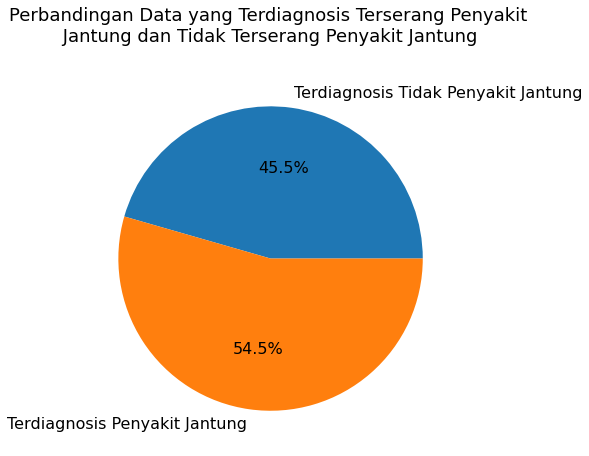

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(df_target.values, labels = ["Terdiagnosis Tidak Penyakit Jantung", "Terdiagnosis Penyakit Jantung"], autopct='%1.1f%%',textprops = {"fontsize" : 16}) 

plt.title("Perbandingan Data yang Terdiagnosis Terserang Penyakit \n Jantung dan Tidak Terserang Penyakit Jantung \n",fontsize = 18)
plt.show()

Diperoleh bahwa data Terdiagnosis Penyakit Jantung (pada data bernilai "1") memiliki jumlah yang lebih besar, yakni 54,5 % dibandingkan dengan data yang Terdiagnosis Tidak Penyakit Jantung (pada data bernilai "0") sebesar 45,5%.

## Data Perbandingan Penyakit Jantung berdasarkan Gender

In [ ]:
df_sex = df.groupby(["sex","target"]).size()
df_sex

sex  target
0    0          24
     1          72
1    0         114
     1          93
dtype: int64

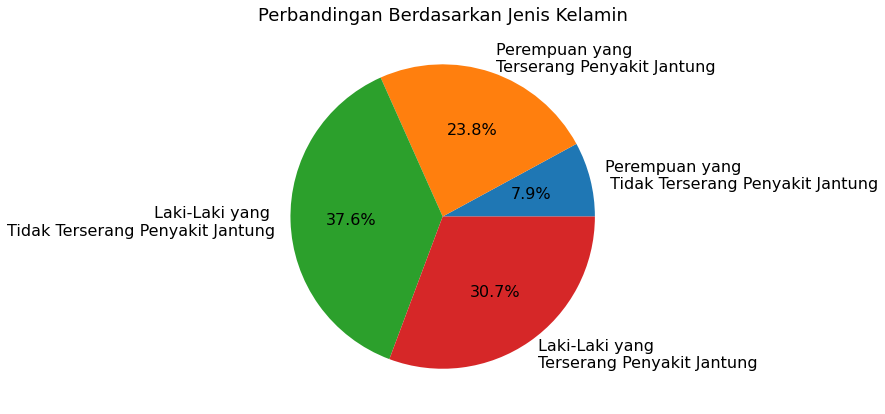

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(df_sex.values, labels = ["Perempuan yang \n Tidak Terserang Penyakit Jantung", "Perempuan yang \nTerserang Penyakit Jantung", "Laki-Laki yang \nTidak Terserang Penyakit Jantung", "Laki-Laki yang \nTerserang Penyakit Jantung"],autopct='%1.1f%%', textprops = {"fontsize" : 16})

plt.title("Perbandingan Berdasarkan Jenis Kelamin",fontsize = 18)
plt.show()

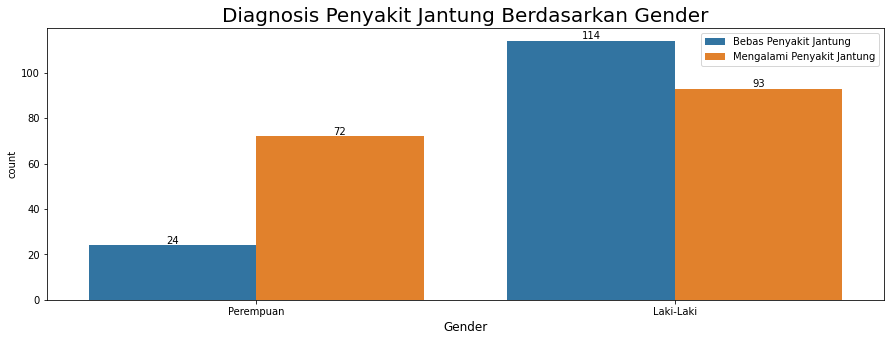

In [ ]:
x = ["Perempuan","Laki-Laki"]
values = range(len(x))

plt.figure(figsize=(15,5))
ax = sns.countplot(x="sex", hue="target", data=data_to_use)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.8,rect.get_height(),horizontalalignment='center', fontsize = 10)
plt.title("Diagnosis Penyakit Jantung Berdasarkan Gender",fontsize = 20)
plt.legend(["Bebas Penyakit Jantung","Mengalami Penyakit Jantung"],loc='upper right')
plt.xlabel("Gender",fontsize = 12)
plt.xticks(values,x)
plt.show()

Rasio laki-laki memiliki penyakit jantung adalah 30,7%, sedikit lebih tinggi dari perempuan.

Selanjutnya distribusi  umur sebagai berikut.

## Data Perbandingan Penyakit Jantung Berdasarkan Umur

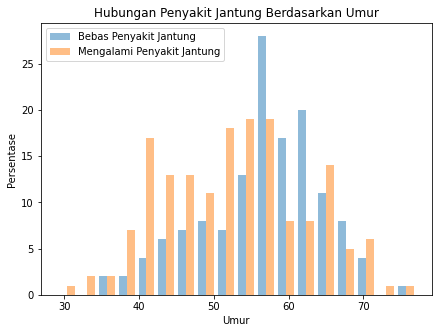

In [ ]:
plt.figure(figsize=(7,5))
plt.hist([df[df.target==0].age, df[df.target==1].age], bins = 18, alpha = 0.5, label = ["Bebas Penyakit Jantung","Mengalami Penyakit Jantung"])
plt.xlabel("Umur")
plt.ylabel("Persentase")
plt.title("Hubungan Penyakit Jantung Berdasarkan Umur")
plt.legend()
plt.show()

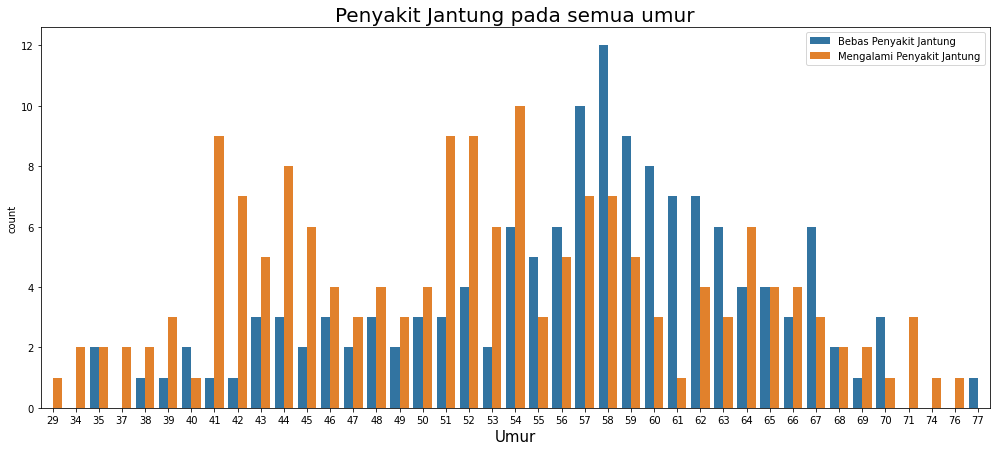

In [ ]:
data_to_use = df.copy()

plt.figure(figsize=(17,7))
ax = sns.countplot(x="age", hue="target", data=data_to_use)
plt.title("Penyakit Jantung pada semua umur",fontsize = 20)
plt.legend(["Bebas Penyakit Jantung","Mengalami Penyakit Jantung"],loc='upper right')
plt.xlabel("Umur",fontsize = 15)
plt.show()

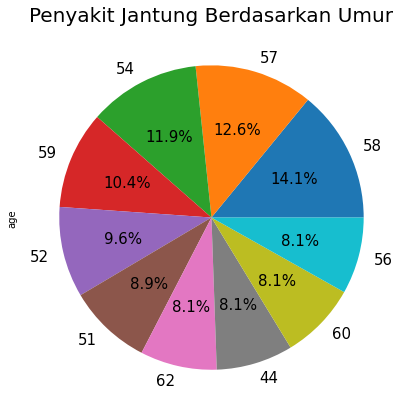

In [ ]:
plt.figure(figsize=(7,7))
df = df.age.value_counts().to_frame()
textprops = {"fontsize":15}
df.head(10).age.plot(kind='pie',autopct='%1.1f%%',textprops =textprops )

plt.title("Penyakit Jantung Berdasarkan Umur",fontsize = 20)
plt.show()

Rasio menjadi lebih tinggi di atas usia empat puluh. Artinya, orang yang berusia di atas empat puluh tahun berisiko tinggi terkena penyakit jantung.

<Figure size 864x576 with 0 Axes>

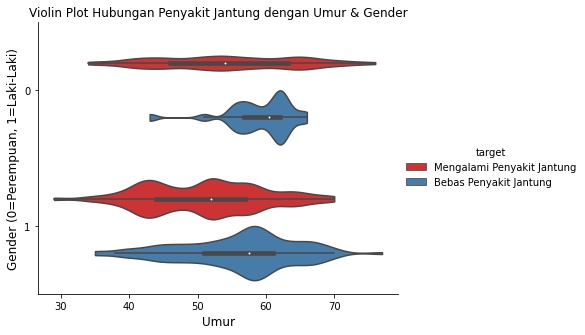

In [ ]:
df_modified = df.copy()
df_modified['target'] = df_modified['target'].replace({0: 'Bebas Penyakit Jantung', 1: 'Mengalami Penyakit Jantung'})
plt.figure(figsize=(12,8))
sns.catplot(x="age", y="sex",
            hue="target",
            data=data_modified,
            orient="h", height=4.5, aspect=1.3,palette="Set1", 
            kind="violin", dodge=True, cut=0, bw=.2)
plt.title("Violin Plot Hubungan Penyakit Jantung dengan Umur & Gender")
plt.xlabel("Umur",fontsize = 12)
plt.ylabel("Gender (0=Perempuan, 1=Laki-Laki)",fontsize = 12)
plt.show()

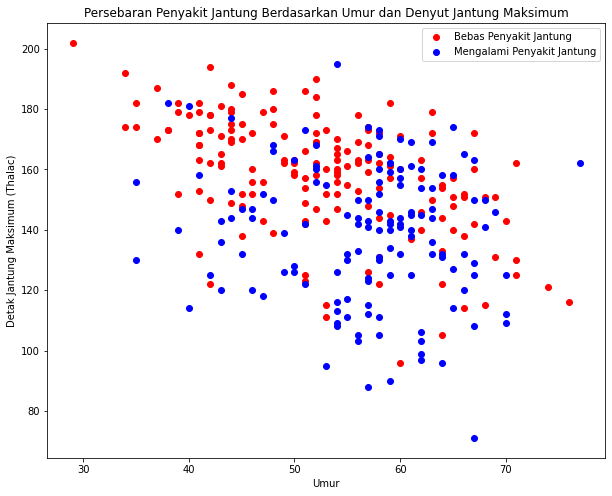

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color="red")
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="blue")
plt.title("Persebaran Penyakit Jantung Berdasarkan Umur dan Denyut Jantung Maksimum")
plt.xlabel("Umur")
plt.ylabel("Detak Jantung Maksimum (Thalac)")
plt.legend(["Bebas Penyakit Jantung","Mengalami Penyakit Jantung"]);

## Analisis Data terhadapt Kolesterol

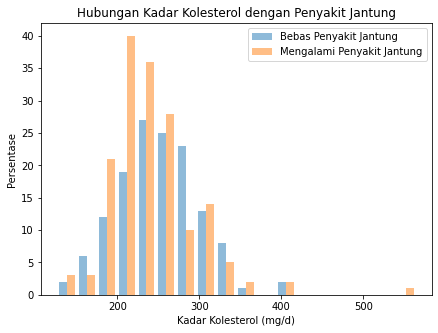

In [ ]:
plt.figure(figsize=(7,5))
plt.hist([df[df.target==0].chol, df[df.target==1].chol], bins = 18, alpha = 0.5, label = ["Bebas Penyakit Jantung","Mengalami Penyakit Jantung"])
plt.xlabel("Kadar Kolesterol (mg/d)")
plt.ylabel("Persentase")
plt.title("Hubungan Kadar Kolesterol dengan Penyakit Jantung")
plt.legend()
plt.show()

Juga, jumlah orang yang memiliki penyakit jantung lebih dari 200mg/dl kolesterol. Menurut penelitian, nilai normal kolesterol harus lebih rendah dari 200mg/dl.

## Analisis Data Terhadap Tekanan Darah

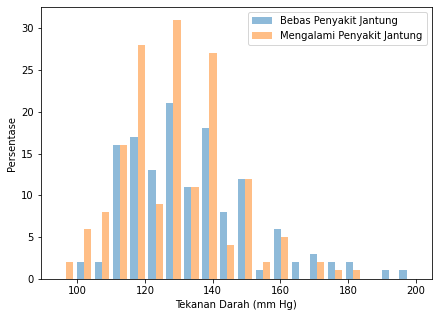

In [ ]:
plt.figure(figsize=(7,5))
plt.hist([df[df.target==0].trestbps, df[df.target==1].trestbps], bins = 20, alpha = 0.5, label = ["Bebas Penyakit Jantung","Mengalami Penyakit Jantung"])
plt.xlabel("Tekanan Darah (mm Hg)")
plt.ylabel("Persentase")
plt.legend()
plt.show()

Tekanan darah idealnya harus lebih rendah dari 120 mmHg. Lebih dari 50% pasien memiliki tekanan darah tinggi.

Distribusi Denyut Jantung sebagai berikut.

## Analisis Data Terhadap Denyut Jantung

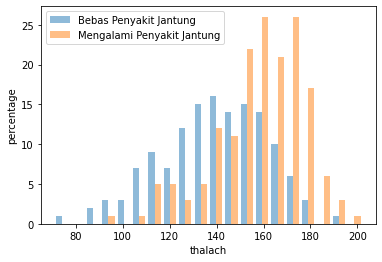

In [ ]:
plt.hist([df[df.target==0].thalach, df[df.target==1].thalach], bins = 20, alpha = 0.5, label = ["Bebas Penyakit Jantung","Mengalami Penyakit Jantung"])
plt.xlabel("thalach")
plt.ylabel("percentage")
plt.legend()
plt.show()

In [ ]:
df_1 = df[["age", "trestbps", "chol", "thalach", "oldpeak"]]
df_1.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [ ]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


## Analisis Persebaran Data

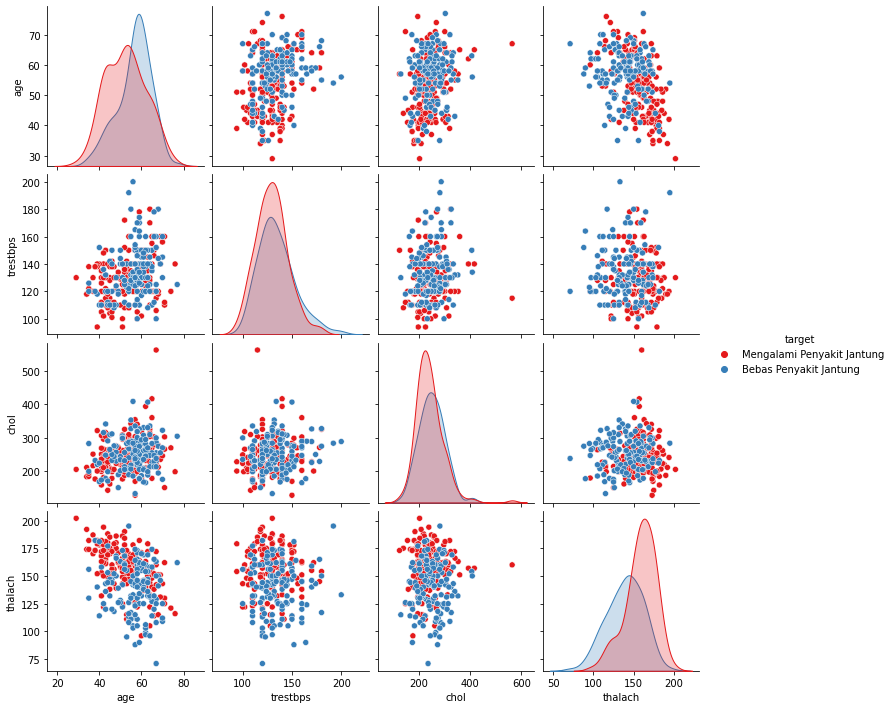

In [ ]:
data_to_use = df.copy()

cont_data = data_to_use[["age","trestbps","chol","thalach","target"]].copy()
cont_data['target'] = cont_data['target'].replace({0: 'Bebas Penyakit Jantung', 1: 'Mengalami Penyakit Jantung'})

sns.pairplot(cont_data ,hue = "target", palette="Set1" )
plt.show()

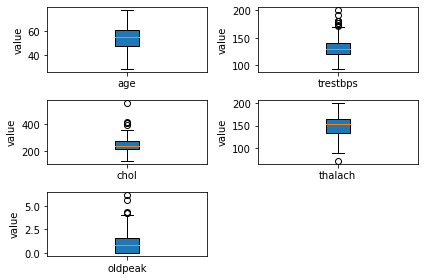

In [ ]:
for item in df_1.columns:
    plt.subplot(3,2,list(df_1.columns).index(item)+1)
    plt.boxplot(df_1[item], patch_artist=True, labels = [item])
    plt.ylabel("value")
plt.tight_layout()
plt.show()

Ada outlier pada tiap komponen kecuali usia.

## Analisis Menggunakan Heatmap

               age  trestbps      chol   thalach
age       1.000000  0.279351  0.213678 -0.398522
trestbps  0.279351  1.000000  0.123174 -0.046698
chol      0.213678  0.123174  1.000000 -0.009940
thalach  -0.398522 -0.046698 -0.009940  1.000000


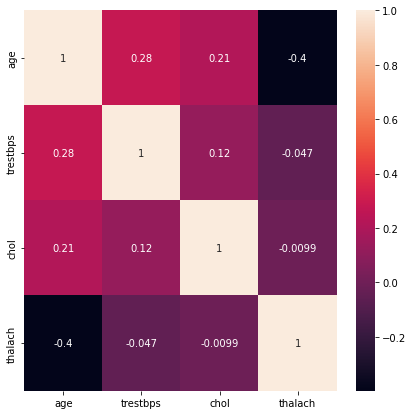

In [ ]:
print(cont_data.corr())
plt.figure(figsize=(7,7))
sns.heatmap(cont_data.corr(), annot=True)
plt.show()

## Gerrit Ezra Yudi Kairupan
## 19/446777/TK/49882